<h1>Chord Representation and Indexing with Spectrograms</h1>
<br>
In this Notebook we are going to explore a different approach on the preprocessing of chord annotations and spectrogramms.<br>
We used one hot encodings for every timestep of the spectrogram, and saw the enormous amount of memory that was needed.<br>
<br>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#python input/output and regex
import re
import os
from pathlib import Path

#chord info
import pychord as pc

#librosa
import librosa
import librosa.display

<h2>Chord Representations</h2><br>
<b>Idea: </b> Instead of having one hot vectors of size N, where N is the number of unique chords in the dataset, we will connect the notes with the chords. Meaning, a <b>G</b> chord is comprised of a G, B and a D. <b>G7</b> is comprised of G,B,D,F. <b>C#</b> is comprised of C#,E#(F),G#. Etc.<br>
<br><b>Explore the use of Chromagrams instead of spectrograms</b><br>
https://musicinformationretrieval.com/chroma.html<br>
<br>
So, let's build a tool, that will <u>map</u> <b>Chords to Notes</b> and <b>Notes to Chords</b><br>

In [35]:
c = pc.Chord("G7")
c.components()

['G', 'B', 'D', 'F']

In [36]:
pc.note_to_chord(['A', 'C', 'E', 'G'])

[<Chord: Am7>, <Chord: C6/A>]

In [37]:
def Chord_to_Notes():
    return

In [38]:
def Notes_to_Chord():
    return

After we built these tools, we will create a dataset, where the encodings of each chord won't be of size (407,1) but of (#NumberOfNotes,1)

<h2>Chromagrams</h2>
<br>
1. Constructing chromagram from raw audio:<br>

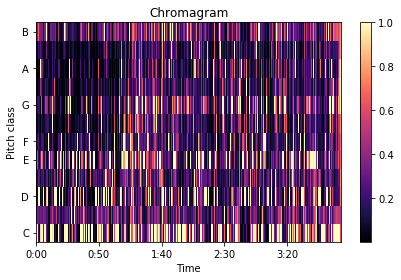

In [75]:
track, sr = librosa.load('Audiofiles/The Beatles/12_-_Let_It_Be/wav/06.Let It Be (Remastered 2009).wav')

n_fft = 2048
hop_length = 512

chroma = librosa.feature.chroma_stft(track, sr=sr, n_fft=n_fft, hop_length=hop_length)

librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

In [76]:
chroma.shape

(12, 10469)